In [1]:
import json
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pandas.io.json import json_normalize
from pandas import HDFStore, read_hdf

%matplotlib inline 

### Test Json Loading

In [111]:
data = [
  {
    'name': {
      'first': 'vikash',
      'last': 'singh'
    },
    'age': 27
  },
  {
    'name': {
      'first': 'satyam',
      'last': 'singh'
    },
    'age': 14
  }
]


In [112]:
df = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df

,age,name.first,name.last
0,27,vikash,singh
1,14,satyam,singh


## 1. Load from Text

In [113]:
with open('ProgrammWebScrapy.txt', encoding='utf-8') as data_file:
    f = data_file.read()
    data = json.loads(f, strict=False)

In [114]:
df = pd.DataFrame.from_dict(json_normalize(data), orient='columns')

In [115]:
df[1:11]

,APIEndpoint,APIForumMessageBoards,APIPortalHomePage,APIProvider,ArchitecturalStyle,AuthenticationModel,Description,DeviceSpecific,DocsHomePageUR,IsThisanUnofficialAPI,IstheAPIDesign,PrimaryCategory,RestrictedAccess,SSLSupport,Scope,SecondaryCategories,SupportEmailAddress,SupportedRequestFormats,SupportedResponseFormats,Title
1,http://twitter.com/statuses/,http://groups.google.com/group/twitter-develop...,https://dev.twitter.com/rest/public,Twitter,REST,OAuth 2,"It has been split into multiple APIs, includin...",No,https://dev.twitter.com/rest/public,No,Yes,Social,No,No,Single purpose API,Blogging,api@twitter.com,URI Query String/CRUD,"Atom, JSON, RSS, XML",Twitter API
2,https://www.youtube.com/iframe_api,http://groups.google.com/group/youtube-api/,https://developers.google.com/youtube/,Google,REST,API Key,The Data API allows users to integrate their p...,No,https://developers.google.com/youtube/,No,No,Video,No,No,Single purpose API,Media,NaN,"Atom, GData, RSS, URI Query String/CRUD, Atom ...","XML, JSON, GData, Atom, RSS",YouTube API
3,http://api.flickr.com/services/,http://www.flickr.com/groups/api,http://www.flickr.com/services/api/,Flickr,REST,OAuth 1,The Flickr API can be used to retrieve photos ...,No,http://www.flickr.com/services/api/,No,No,Photos,No,Yes,Single purpose API,Video,NaN,"URI Query String/CRUD, XML, PHP, XML-RPC","JSON, XML, PHP, XML-RPC",Flickr API
4,http://api.facebook.com/restserver.php,http://forum.developers.facebook.com/,https://developers.facebook.com/,Facebook,REST,"API Key, OAuth 2",Its functions have been split among the follow...,No,https://developers.facebook.com/,No,No,Social,No,Yes,Single purpose API,Webhooks,NaN,URI Query String/CRUD,JSON,Facebook API
5,http://webservices.amazon.com/,http://developer.amazonwebservices.com/connect...,https://affiliate-program.amazon.com/gp/advert...,Amazon,REST,API Key,What was formerly the ECSeCommerce Servicehas ...,No,https://docs.aws.amazon.com/AWSECommerceServic...,No,Yes,eCommerce,Yes,No,Single purpose API,Advertising,NaN,"SOAP, XML","SOAP, XML",Amazon Product Advertising API
6,https://api.twilio.com/2010-04-01,https://www.twilio.com/blog,http://www.twilio.com,Twilio,REST,"API Key, HTTP Basic Auth",Twilio provides a simple hosted API and markup...,No,https://www.twilio.com/docs/api/rest,No,No,Telephony,No,Yes,Single purpose API,"Cloud, Text-to-Speech, Voice, Webhooks",help@twilio.com,URI Query String/CRUD,"CSV, HTML, JSON, XML",Twilio API
7,http://ws.audioscrobbler.com/2.0/,http://www.last.fm/group/Last.fm+Web+Services/...,http://www.last.fm/api,Last.fm,REST,"API Key, Shared Secret, Token",The Last.fm API gives users the ability to bui...,No,http://www.last.fm/api,No,Yes,Music,No,No,Single purpose API,NaN,office@last.fm,URI Query String/CRUD,"JSON, XML",Last.fm API
8,http://developer.ebay.com/webservices/latest/e...,http://developer.ebay.com/community/forums/,https://go.developer.ebay.com/developers/ebay,NaN,REST,NaN,eBay's primary web services are found in the t...,No,https://go.developer.ebay.com/developers/ebay,No,No,Search,No,Yes,Single purpose API,"Auctions, eCommerce",NaN,"XML, SOAP, URI Query String/CRUD, name-value","XML, SOAP, JSON",eBay API
9,NaN,http://forum.twilio.com/twilio/?from_gsfn=true,http://www.twilio.com/sms,NaN,REST,NaN,Twilio provides a simple hosted API and markup...,No,http://www.twilio.com/sms,No,No,Messaging,No,Yes,Single purpose API,"Telephony, USA",NaN,None Specified,XML,Twilio SMS API
10,See-> http://dev.live.com/virtualearth/sdk/,http://social.msdn.microsoft.com/forums/en-US/...,http://www.microsoft.com/maps/choose-your-bing...,Microsoft,Indirect,API Key,Bing Maps API and Interactive SDK features an ...,No,http://www.microsoft.com/maps/choose-your-bing...,No,No,Mapping,No,Yes,Single purpose API,Viewer,NaN,"KML, XML, GeoRSS, JavaScript",KML,Microsoft Bing Maps API


In [116]:
df.shape

(15344, 20)

In [117]:
df.columns

Index(['APIEndpoint',
       'APIForumMessageBoards',
       'APIPortalHomePage',
       'APIProvider',
       'ArchitecturalStyle',
       'AuthenticationModel',
       'Description',
       'DeviceSpecific',
       'DocsHomePageUR',
       'IsThisanUnofficialAPI',
       'IstheAPIDesign',
       'PrimaryCategory',
       'RestrictedAccess',
       'SSLSupport',
       'Scope',
       'SecondaryCategories',
       'SupportEmailAddress',
       'SupportedRequestFormats',
       'SupportedResponseFormats',
       'Title'],
      dtype='object')

In [118]:
# equal to df.PrimaryCategory
label = df['PrimaryCategory']
label

0                                Mapping
1                                 Social
2                                  Video
3                                 Photos
4                                 Social
5                              eCommerce
6                              Telephony
7                                  Music
8                                 Search
9                              Messaging
10                               Mapping
11                             Bookmarks
12                                 Tools
13                                Social
14                               Widgets
15                  Electronic Signature
16                               Storage
17                           Advertising
18                             Reference
19                             Reference
20                               Content
21                                 Cloud
22                                Search
23                                Social
24              

## 1. Preprocessing Null

### Some Category is Null

In [119]:
label.isnull().sum()

35

In [120]:
label[label.isnull()]

93       NaN
113      NaN
281      NaN
298      NaN
587      NaN
629      NaN
639      NaN
659      NaN
982      NaN
1307     NaN
1359     NaN
1371     NaN
1387     NaN
1920     NaN
3140     NaN
4066     NaN
4666     NaN
11668    NaN
12240    NaN
12465    NaN
12750    NaN
12813    NaN
13378    NaN
13423    NaN
13544    NaN
13819    NaN
14100    NaN
14637    NaN
14659    NaN
14682    NaN
14687    NaN
14852    NaN
14876    NaN
14887    NaN
15267    NaN
Name: PrimaryCategory, dtype: object

### Get rid of Null Category Entry

In [121]:
data = df.loc[label.notnull(), :]

### Get rid of Description and Category is ''

In [122]:
des = data.Description
des.isnull().sum()
data = df[df.Description != '']

In [123]:
data = data[data.PrimaryCategory != '']
data.shape

(15340, 20)

### Checking Second Entry

In [124]:
data.loc[2, 'Description']

"The Data API allows users to integrate their program with YouTube and allow it to perform many of the operations available on the website. It provides the capability to search for videos, retrieve standard feeds, and see related content. A program can also authenticate as a user to upload videos, modify user playlists, and more. This integration can be used for a variety of uses such as developing a web application allowing users to upload video to YouTube, or a device or desktop application that brings the YouTube experience to a new platform. The Data API gives users programmatic access to the video and user information stored on YouTube. This can be used to personalize a web site or application with the user's existing information as well as perform actions like commenting on and rating videos. This RESTful API provides responses in XML format."

In [125]:
data.loc[2, 'PrimaryCategory']

'Video'

In [126]:
data.loc[2, 'APIProvider']

'Google'

In [127]:
data.loc[:, 'PrimaryCategory'].head()

0    Mapping
1     Social
2      Video
3     Photos
4     Social
Name: PrimaryCategory, dtype: object

### How many primary category in the data?

In [128]:
len(set(data.loc[:, 'PrimaryCategory']))

402

### Final Data, Input = Description, Output = PrimaryCategroy

In [144]:
finaldata = pd.DataFrame(data, columns=['Description', 'PrimaryCategory'])

In [167]:
finaldata.columns = ['Service Desciption', 'Service Classification']

In [168]:
finaldata.shape

(15340, 2)

In [169]:
top10 = finaldata.head(5)
#top10.style.set_properties(subset=['Service Classification'], **{'width': '400px', 'text-align': 'left'})
#top10.style.set_properties(subset=['Service Desciption'], **{'width': '600px', 'text-align': 'left', "font-size": "100%"})


styles = [
    dict(selector="th", props=[("font-size", "180%"), ("text-align", "left")]),
    dict(selector="td", props=[("font-size", "120%"), ("text-align", "left")]),
    dict(selector="caption", props=[("caption-side", "bottom"), ('width', '600px')]),
]
top10.style.set_table_styles(styles)

#top10.style.set_properties(subset=['Service Classification'], **{'width': '150px', 'text-align': 'left'})


# html

,Service Desciption,Service Classification
0,"Google Maps' services have been split into multiple APIs, including the Static Maps API, Street View Image API, Directions APIs, Distance Matrix API, Elevation API, Geocoding API, Geolocation API, Places API, Roads API, and Time Zone API. This page is maintained purely for historical and research purposes.] The Google Maps API allow for the embedding of Google Maps onto web pages of outside developers, using a simple JavaScript interface or a Flash interface. It is designed to work on both mobile devices as well as traditional desktop browser applications. The API includes language localization for over 50 languages, region localization and geocoding, and has mechanisms for enterprise developers who want to utilize the Google Maps API within an intranet. The API HTTP services can be accessed over a secure (HTTPS) connection by Google Maps API Premier customers.",Mapping
1,"It has been split into multiple APIs, including the Twitter Ads API, Twitter Search Tweets API, and Twitter Direct Message API. This profile is maintained for historical, research, and reference purposes only.The Twitter micro-blogging service includes two RESTful APIs. The Twitter REST API methods allow developers to access core Twitter data. This includes update timelines, status data, and user information. The Search API methods give developers methods to interact with Twitter Search and trends data. The API presently supports the following data formats: XML, JSON, and the RSS and Atom syndication formats, with some methods only accepting a subset of these formats.",Social
2,"The Data API allows users to integrate their program with YouTube and allow it to perform many of the operations available on the website. It provides the capability to search for videos, retrieve standard feeds, and see related content. A program can also authenticate as a user to upload videos, modify user playlists, and more. This integration can be used for a variety of uses such as developing a web application allowing users to upload video to YouTube, or a device or desktop application that brings the YouTube experience to a new platform. The Data API gives users programmatic access to the video and user information stored on YouTube. This can be used to personalize a web site or application with the user's existing information as well as perform actions like commenting on and rating videos. This RESTful API provides responses in XML format.",Video
3,"The Flickr API can be used to retrieve photos from the Flickr photo sharing service using a variety of feedspublic photos and videos, favorites, friends, group pools, discussions, and more. The API can also be used to upload photos and video.The Flickr API supports many protocols including REST, SOAP, XML-RPC. Responses can be formatted in XML, XML-RPC, JSON and PHP. Documentation is included for 14 API Kit libraries.",Photos
4,"Its functions have been split among the following APIs: Facebook Ads, Facebook Atlas, Facebook Graph, and Facebook Marketing. This profile is being maintained purely for historical and research purposes.] The Facebook API is a platform for building applications that are available to the members of the social network of Facebook. The API allows applications to use the social connections and profile information to make applications more involving, and to publish activities to the news feed and profile pages of Facebook, subject to individual users privacy settings. With the API, users can add social context to their applications by utilizing profile, friend, Page, group, photo, and event data. The API uses RESTful protocol and responses are in JSON format.",Social


## 2. Categories Anaylsis

### Count Number of Categories

In [170]:
labelcount = finaldata['Service Classification'].value_counts()
labelcount

Tools                  767
Financial              687
Messaging              511
eCommerce              466
Payments               460
Social                 433
Enterprise             412
Mapping                362
Government             304
Telephony              300
Science                298
Email                  255
Reference              251
Video                  251
Search                 251
Security               251
Travel                 243
Sports                 228
Advertising            224
Transportation         218
Education              215
Games                  203
Music                  191
Photos                 185
Cloud                  173
Other                  158
Bitcoin                143
Project Management     142
Data                   142
Shipping               136
                      ... 
Copyright                1
Gestures                 1
Datacenter               1
Trivia                   1
Adoption                 1
Housing                  1
C

### Category Number > 100

In [171]:
labelcount[labelcount > 100].count()

41

### Category Number > 200

In [172]:
labelcount[labelcount > 200].count()

22

In [173]:
labelcount[0:10]

Tools         767
Financial     687
Messaging     511
eCommerce     466
Payments      460
Social        433
Enterprise    412
Mapping       362
Government    304
Telephony     300
Name: Service Classification, dtype: int64

In [174]:
labelcount[0:20]

Tools             767
Financial         687
Messaging         511
eCommerce         466
Payments          460
Social            433
Enterprise        412
Mapping           362
Government        304
Telephony         300
Science           298
Email             255
Reference         251
Video             251
Search            251
Security          251
Travel            243
Sports            228
Advertising       224
Transportation    218
Name: Service Classification, dtype: int64

In [175]:
labelcount[0:30]

Tools                 767
Financial             687
Messaging             511
eCommerce             466
Payments              460
Social                433
Enterprise            412
Mapping               362
Government            304
Telephony             300
Science               298
Email                 255
Reference             251
Video                 251
Search                251
Security              251
Travel                243
Sports                228
Advertising           224
Transportation        218
Education             215
Games                 203
Music                 191
Photos                185
Cloud                 173
Other                 158
Bitcoin               143
Project Management    142
Data                  142
Shipping              136
Name: Service Classification, dtype: int64

In [176]:
labelcount[0:40]

Tools                      767
Financial                  687
Messaging                  511
eCommerce                  466
Payments                   460
Social                     433
Enterprise                 412
Mapping                    362
Government                 304
Telephony                  300
Science                    298
Email                      255
Reference                  251
Video                      251
Search                     251
Security                   251
Travel                     243
Sports                     228
Advertising                224
Transportation             218
Education                  215
Games                      203
Music                      191
Photos                     185
Cloud                      173
Other                      158
Bitcoin                    143
Project Management         142
Data                       142
Shipping                   136
Database                   136
Backend                    134
Stocks  

In [177]:
labelcount[0:50]

Tools                      767
Financial                  687
Messaging                  511
eCommerce                  466
Payments                   460
Social                     433
Enterprise                 412
Mapping                    362
Government                 304
Telephony                  300
Science                    298
Email                      255
Reference                  251
Video                      251
Search                     251
Security                   251
Travel                     243
Sports                     228
Advertising                224
Transportation             218
Education                  215
Games                      203
Music                      191
Photos                     185
Cloud                      173
Other                      158
Bitcoin                    143
Project Management         142
Data                       142
Shipping                   136
Database                   136
Backend                    134
Stocks  

In [178]:
labelcount[0:100]

Tools                               767
Financial                           687
Messaging                           511
eCommerce                           466
Payments                            460
Social                              433
Enterprise                          412
Mapping                             362
Government                          304
Telephony                           300
Science                             298
Email                               255
Reference                           251
Video                               251
Search                              251
Security                            251
Travel                              243
Sports                              228
Advertising                         224
Transportation                      218
Education                           215
Games                               203
Music                               191
Photos                              185
Cloud                               173


### Half of categories less than 10

In [179]:
labelcount[labelcount < 10].count()

217

In [180]:
labelcount[labelcount > 100].count()

41

In [181]:
labelcount[390:401]

Flowers                1
Availability           1
Gadgets                1
Announcements          1
Drawing                1
Developer Relations    1
Viewer                 1
iPaaS                  1
Postcodes              1
Summary                1
Sustainability         1
Name: Service Classification, dtype: int64

In [234]:
maxcount = labelcount[0]
np.mean(abs(maxcount - labelcount))

728.8329177057357

In [201]:
interval = stats.norm.interval(0.9, np.mean(labelcount), np.std(labelcount)) 
interval

(-106.4152107524034, 182.749375340932)

### Histogram

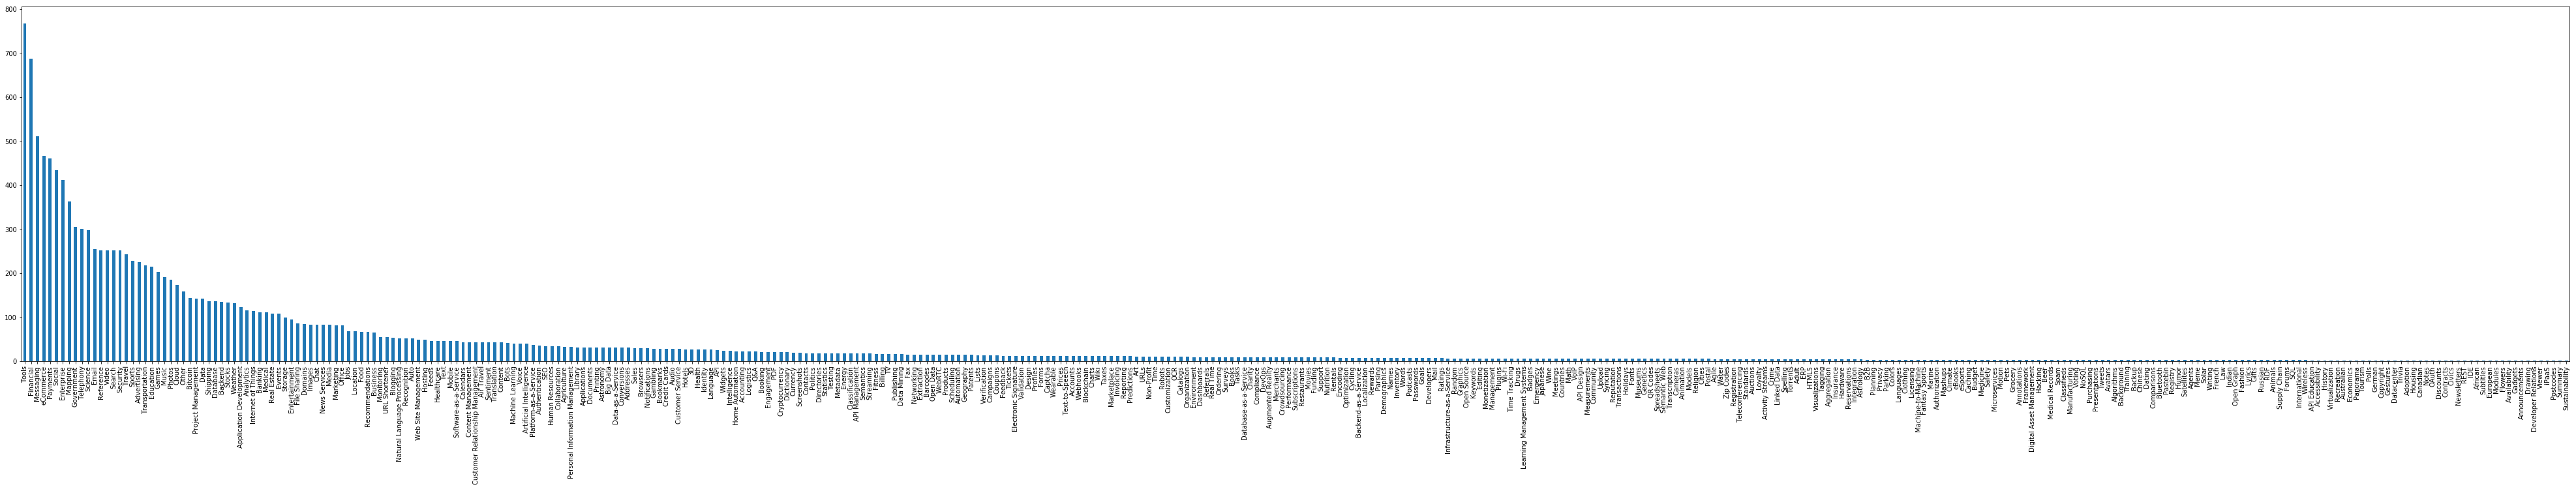

In [202]:
plt.figure(figsize=(70, 10))
labelcount.plot(kind='bar')
plt.savefig('histogramAll.pdf', format='pdf', dpi=300)

### Get TOP 50 categories dataset

In [203]:
top50 = labelcount[0:50]

In [204]:
top50list = list(top50.index)
top50index = finaldata['Service Classification'].isin(top50list)

In [205]:
top50data = finaldata.loc[top50index]
top50data.shape

(10957, 2)

In [206]:
top50labelcount = top50data['Service Classification'].value_counts()
top50labelcount[0]

767

In [207]:
maxcount = top50labelcount[0]
np.mean(abs(maxcount - top50labelcount))

547.86

In [208]:
#merge index and values

#top50labelcount.values
#top50labelcount.index
#top50countpd = pd.DataFrame({'categories': top50labelcount.index, 'count': top50labelcount.values})

In [209]:
#a = top50labelcount.hist()

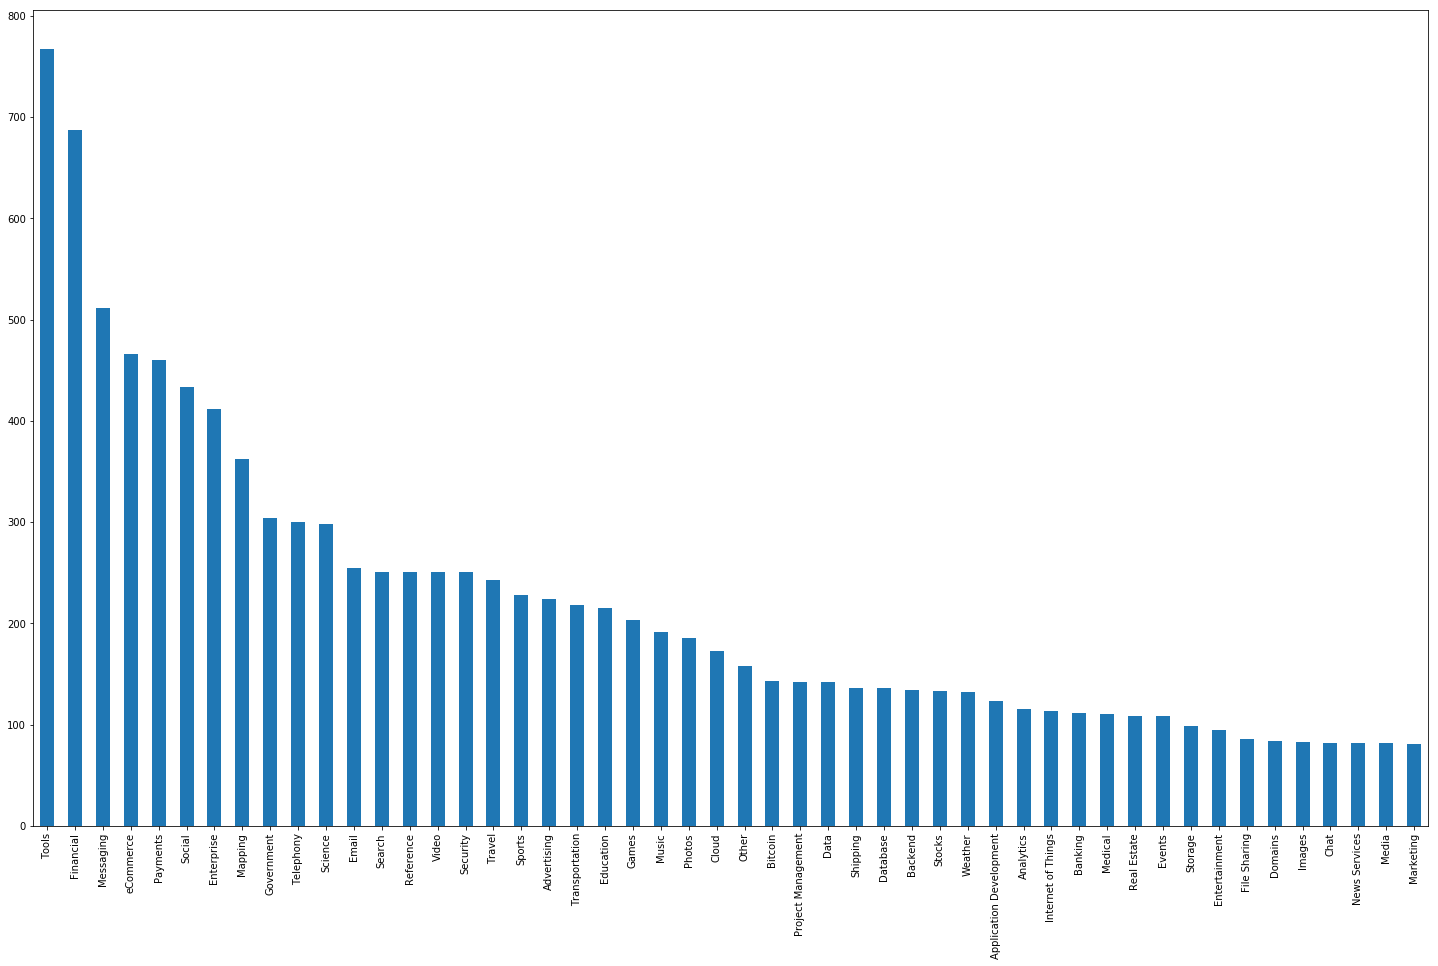

In [210]:
plt.figure(figsize=(25, 15))
top50labelcount.plot(kind='bar')
plt.savefig('histogramTop50.pdf', format='pdf', dpi=300)

## 3. Service Description to Vector

In [211]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import hashing_trick
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot
import numpy as np
from math import *
from scipy import stats

### Max Length of the Description

In [213]:
top50data[top50data['Service Desciption'] == max(top50data['Service Desciption'], key=len)]

,Service Desciption,Service Classification
11856,GroupDocs is an online document management pla...,File Sharing


In [215]:
max(top50data['Service Desciption'], key=len)

'GroupDocs is an online document management platform. GroupDocs allows users and organizations to manage and revise documents, create digital signatures, collaborate on documents, and search for all documents within groups. Various annotation options such as highlighting, underlining, striking out text as well as leaving comments on the text/images are included to make the proof-reading process easier for users. GroupDocs Annotation API for Kentico provides developers with a set of annotation tools, such as Text annotation, Area annotation, Point annotation, Polyline annotation and Strike-out text. Functionality of the Annotation API such as Text or image annotation, collaboration or exporting documents, allows developers to have the ultimate document management experience. Users can upload any PDF file and share this document with their colleagues through GroupDocs Annotation App. Any review comment incorporated will be saved and users can export the annotated PDF document with all th

In [217]:
len(max(top50data['Service Desciption'], key=len).split())

334

### Min Length of the Description

In [218]:
top50data[top50data['Service Desciption'] == min(top50data['Service Desciption'], key=len)]

,Service Desciption,Service Classification
14766,Czech mapping API.,Mapping


In [220]:
min(top50data['Service Desciption'], key=len)

'Czech mapping API.'

In [223]:
len(min(top50data['Service Desciption'], key=len).split())

3

In [224]:
f = lambda x : len(x.split())
lens = top50data['Service Desciption'].apply(f)

In [225]:
mu = np.mean(lens)
mu

67.32107328648353

In [226]:
sigma = np.std(lens)
sigma

25.98412272809889

In [227]:
interval = stats.norm.interval(0.9, mu, sigma) 
interval

(24.580994774017867, 110.06115179894917)

In [228]:
np.max(lens)

373

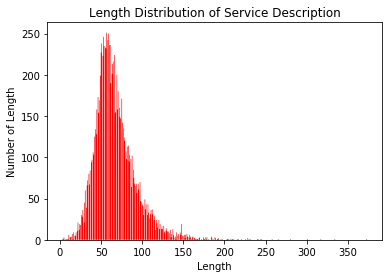

In [229]:
#data = np.random.normal(mu,sigma,1000) 
 
#x = np.linspace(0, 700, 1000)
#y = (1. / sqrt(2 * np.pi) / sigma)*np.exp( -((x-mu)**2/(2*sigma**2)) )
 
#plt.hist(data,bins=100,facecolor='g',alpha=0.44)
plt.hist(lens, bins=500, facecolor='r',histtype='stepfilled')
#plt.plot(x,y,color='b')   
 
plt.xlabel('Length')
plt.ylabel('Number of Length')
plt.title('Length Distribution of Service Description')
plt.savefig('histogramDescription.pdf', format='pdf', dpi=300)

In [230]:
finaltop50data = top50data[(lens >= interval[0]) & (lens <= interval[1])]

In [231]:
finaltop50data.shape

(10184, 2)

## 4. Save as csv and h5 file (pd to h5)

In [232]:
finaltop50data.to_csv('service.csv', encoding='utf-8', index=False, header=False)

In [233]:
finaltop50data.head().to_csv('service-head.csv', encoding='utf-8', index=False, header=False)

In [245]:
h5f = HDFStore('../data/service.h5')
h5f.put('top50service', finaltop50data)
h5f.close()